In [22]:
""" using lifetimes to determine customer retention/value """
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lifetimes import BetaGeoFitter
from lifetimes.plotting import (plot_frequency_recency_matrix,
                                plot_period_transactions,
                                plot_probability_alive_matrix)

In [23]:
project_dir = os.path.join(os.path.dirname('__file__'), os.pardir)
data_path = os.path.join(project_dir, 'data/processed/')
clv_filename = data_path + 'CLV_data.csv'

In [35]:
# read in consumer lifetime value and set index to user id
LIMIT = 150000
df = pd.read_csv(clv_filename, nrows=LIMIT)
df.set_index('user_id')
df.head()

,user_id,frequency,recency,t
0,27227,4,90,120
1,27294,15,128,133
2,27324,19,162,175
3,27343,12,141,145
4,27367,18,180,182


In [36]:
bgf = BetaGeoFitter(penalizer_coef=0.1)
bgf.fit(df.frequency, df.recency, df.t)
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,1.293652e+00,3.759147e-03,1.286284e+00,1.301020e+00
alpha,1.527974e+01,5.957748e-02,1.516296e+01,1.539651e+01
a,2.801584e-18,1.177355e-14,-2.307335e-14,2.307895e-14
b,6.316475e-06,4.365020e-03,-8.549122e-03,8.561755e-03


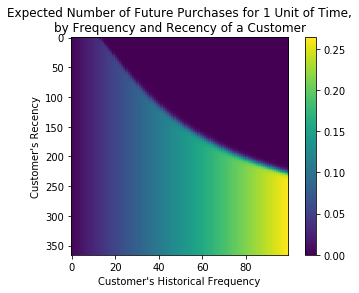

In [37]:
plot_frequency_recency_matrix(bgf)

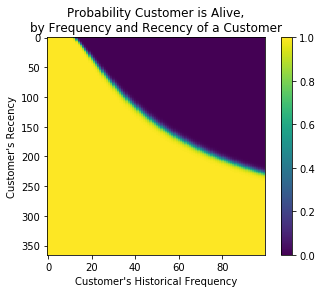

In [38]:
plot_probability_alive_matrix(bgf)

In [39]:
t = 1
df['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, df['frequency'], df['recency'], df['t'])           
df.sort_values(by='predicted_purchases').tail(5)


,user_id,frequency,recency,t,predicted_purchases
48989,100787,99,54,54,1.447662
6586,191755,99,54,54,1.447662
111820,54485,99,47,47,1.610374
128957,134572,99,29,29,2.265001
21377,46408,99,23,23,2.620019


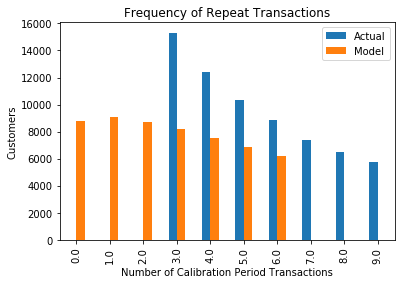

In [40]:
plot_period_transactions(bgf)